Use any additional libraries you want, but if you don't explicitly code stuff that I have explicitly asked you to code, you will not get marks.

### Q1. Kernel k-means

Let's try and end our course on a happy note. The smiley dataset you see below is made up of many clusters of points. 

In [ ]:
import numpy as np
import numpy.linalg as lin
import numpy.random as rnd
from matplotlib import pyplot as plt


def getFigure( sizex = 7, sizey = 7 ):
    fig = plt.figure( figsize = (sizex, sizey) )
    return fig

def plot2D( X, fig, color = 'r', marker = '+', size = 100, empty = False ):
    plt.figure( fig.number )
    if empty:
        plt.scatter( X[:,0], X[:,1], s = size, facecolors = 'none', edgecolors = color, marker = marker  )
    else:
        plt.scatter( X[:,0], X[:,1], s = size, c = color, marker = marker )


def genCrescentData( d, n, mu, r, flipped = False ):
    X = np.vstack( (np.cos( np.linspace( 0, np.pi, n ) ), np.sin( np.linspace( 0, np.pi, n ) ) ) ).T
    if flipped:
        X[:,1] = -np.abs( X[:,1] )
    else:
        X[:,1] = np.abs( X[:,1] )
    X = (X * r) + mu
    return X

def genSphericalData( d, n, mu, r ):
    X = rnd.normal( 0, 1, (n, d) )
    norms = lin.norm( X, axis = 1 )
    X = X / norms[:, np.newaxis]
    X = (X * r) + mu
    return X

In [ ]:
d = 2
n = 200

mu1 = np.array( [0,0] )
mu2 = np.array( [0,1] )
mu3 = np.array( [0,0] )
mu4 = np.array( [-3,5] )
mu5 = np.array( [3,5] )

tmp1 = genCrescentData( d, n, mu1, 1 )
tmp2 = genCrescentData( d, n, mu2, 5, flipped = True )
tmp3 = genSphericalData( d, n, mu3, 10 )
tmp4 = genSphericalData( d, n, mu4, 1 )
tmp5 = genSphericalData( d, n, mu5, 1 )
X = np.vstack( (tmp1, tmp2, tmp3, tmp4, tmp5) )

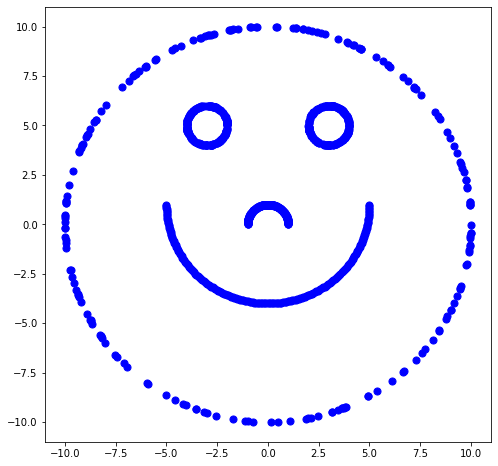

In [ ]:
fig = getFigure( 8, 8 )
plot2D( X, fig, size = 50, color = 'b', marker = 'o' )

(a) Can you implement the k-means algorithm to cluster this dataset? Visualize your output. [10 points] 

(b) Implement k-means++ to initialize cluster centers usefully. [5 points]

(c) What value of k gives you the best clustering? Are you happy with the quality of the clustering? [5 points]


(d) I'm going to say that we want to be able to do better than this. So I want you to kernelize your k-means algorithm with a Gaussian kernel. Visualize the clustering output of your kernel k-means algorithm [15 points]

##### Q1/ a)

In [ ]:
import sys
from sklearn.metrics.pairwise import euclidean_distances
import random

In [ ]:
def initialize_random_means(X, k ):

  """ The function randomly initializes k no of cluster means and return them  """

  index = np.array( range(X.shape[0]))
  np.random.shuffle(index)  # Shuffling to bring the first 5 numbers randomly
  means =  X[index[0:k], :] # Creating an array of the arbitrarily picked means

  return means

In [ ]:
def k_means(X , k = 5, use_k_means_pp = 0, max_iter = 10000,  tolerance = 1e-1000):

  """ Distribute the data into k clusters or buckets, 
      use_k_means_pp == 1 means use K Menas Plus Plus algorithm to intialize the cluster means, else randomly initialize
      tolerance : Maximum allowed change in the loss function to reach the convergence criteria.

      Return : All the clusters, Means, the K MeansLoss, maximum number of iterations to converge, initial cluster means, and the indices of data in each bucket
      """

  
  if use_k_means_pp == 0:
    means =  initialize_random_means(X, k)                 # Randomly Initialize Cluster Means
  else:
    means = initialize_k_means_pp(X, k)                    # Initialize via K Means Plus Plus
  
  initial_means = means

  for it in range(max_iter):                              # Iteration of K Means

    buckets = [[] for _ in range(k)]                      # Stores the clusters
    ind = [[] for _ in range(k)]                          # Stoire the indexes of each data values going to a specific clustyer
    for i in range(X.shape[0]):
      t_dist = np.sum((X[i, :] - means) ** 2, axis = 1)  # Stores the distance of the i-th data and each of the k cluster means
      min_value = np.amin(t_dist)                         # Finds the mini,um value of the distances, i.e. finding the closest clusters 
      bucket_no = np.where (t_dist == min_value)          # Finding the index of the closest cluster
      buckets[bucket_no[0][0]].append(X[i, :])            # Adding to the specific cluster
      ind[bucket_no[0][0]].append(i)                      # Adding the index of the data to the specific cluster

    diff = 0                                              # Stores the diff between the mean of the previous iteration and the current iteration
    updated_means = [[] for _ in range(k)]                 
    for j in range(k):
      updated_means[j] = np.mean(buckets[j],0)            # Updating the means acc to the cluster assigning
      diff = diff + np.sum((means[j] - updated_means[j]) ** 2)

    if (diff <= tolerance):
      break                                                 # Convergenbce criteria reached if the change in the mnean values ism less than tolerance
    means = updated_means

  # cALCULATING k means lOSS
  loss = 0
  for i in range(k):
    each_bucket = buckets[i]
    for j in range(len(each_bucket)):
      loss = loss + np.sqrt(np.sum( (buckets[i][j] - means[i])**2 ) )   # Calculating the inter cluster distances between the data point of each cluster with its corresponding mean values and adding

  return (buckets, means, loss, it, initial_means, ind)

In [ ]:
def plot_clusters( buckets, means, fig, size = 100, marker = 'o'):

  """ Plot the K Clusters along  with their Means and shows the plot """

  plt.figure( fig.number )
  color = ['r','g','b','c','m','y','k','xkcd:cloudy blue', 'xkcd:ruby', 'xkcd:light moss green', 'xkcd:golden rod', 'xkcd:raw umber','xkcd:pinky']
  means = np.array(means)
  k = means.shape[0]
  #plt.grid()
  for i in range(k):
    each_bucket = np.array(buckets[i])
    plt.scatter(each_bucket[:, 0], each_bucket[:,1],c = color[i%13], s = size, marker = marker)
    plt.scatter(means[i,0], means[i,1],  marker = "^",c = color[i%13], edgecolor = "r", s = size*3  )
  plt.show()
  print("The graph is showing the clusters, and the Triangles are dnoting the corresponding cluster means")

The Algorithm Converged (i.e. the update or shift of Cluster Means between successive iterations is zero) in 23 iterations.
And the loss of the K Means is 2166.1295623897886


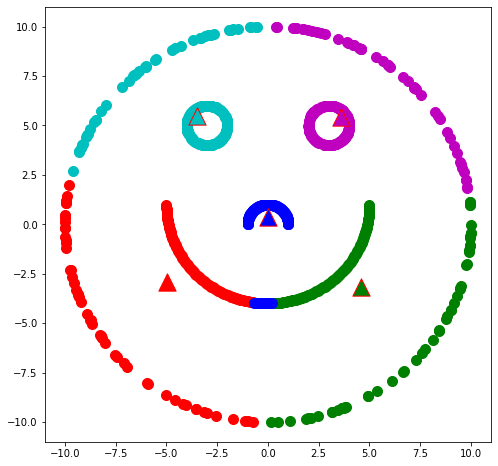

The graph is showing the clusters, and the Triangles are dnoting the corresponding cluster means


In [ ]:
(buckets, means, k_means_loss, converge, initial_cluster_means, _) = k_means(X, k = 5, use_k_means_pp=0)
print("The Algorithm Converged (i.e. the update or shift of Cluster Means between successive iterations is zero) in " + str(converge) + " iterations.") 
print("And the loss of the K Means is " + str(k_means_loss))
figure = getFigure(8,8)
plot_clusters(buckets, means, figure)

As we know K Means always converges i.e. the change in the mean values between two coreesponding iterations is Zero, which is haoppening in our case here.

##### b) k_means Plus plus

K Means Plus Plus is a way to initialize the clusters, which is a highly copmpute extensive process, but highly reduces the steps to converge during K Means,as it initialiozes the cluster means to be in different clusters at least expected to do so.

In [ ]:
# function to compute euclidean distance
def distance(p1, p2):
    return np.sum((p1 - p2)**2)
  
# initialization algorithm
def initialize_k_means_pp(data, k):
    '''
    initialized the centroids for K-means++
    inputs:
        data - numpy array of data points having shape (200, 2)
        k - number of clusters
    '''
    ## initialize the centroids list and add
    ## a randomly selected data point to the list
    centroids = []
    centroids.append(data[np.random.randint(data.shape[0]), :])
    #plot(data, np.array(centroids))
  
    ## compute remaining k - 1 centroids
    for c_id in range(k - 1):
         
        ## initialize a list to store distances of data
        ## points from nearest centroid
        dist = []
        for i in range(data.shape[0]):
            point = data[i, :]
            d = sys.maxsize
             
            ## compute distance of 'point' from each of the previously
            ## selected centroid and store the minimum distance
            for j in range(len(centroids)):
                temp_dist = distance(point, centroids[j])
                d = min(d, temp_dist)
            dist.append(d)
             
        ## select data point with maximum distance as our next centroid
        dist = np.array(dist)
        probs = dist / np.sum(dist)
        next_centroid = data[ np.random.choice( np.arange( data.shape[0] ), p = probs ), : ]  #data[np.argmax(dist), :]
        centroids.append(next_centroid)
        dist = []
    
    return centroids

The Algorithm Converged (i.e. the update or shift of Cluster Means between successive iterations is zero) in 13 iterations by using K-Means plus plus Initialization.
And the loss of the K Means is 2205.1806393813717


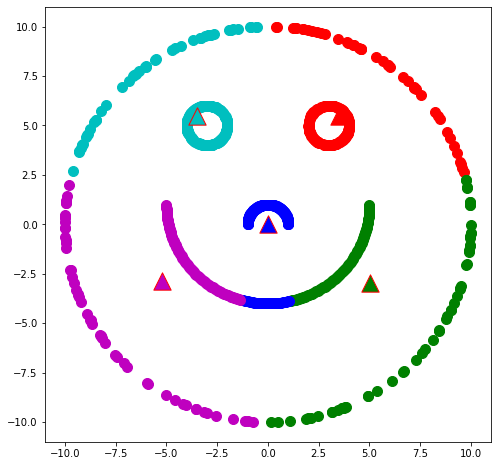

The graph is showing the clusters, and the Triangles are dnoting the corresponding cluster means
 


Text(0.5, 1.0, 'Plotting the Initial Cluster means Selected by k-means plus plus')

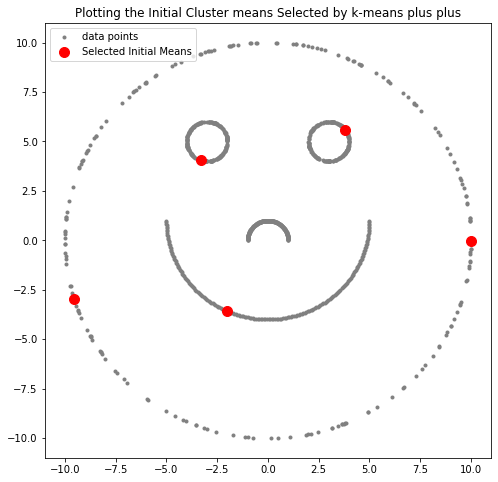

In [ ]:
(buckets, means, k_means_loss, converge, initial_cluster_means, _ ) = k_means(X, k = 5, use_k_means_pp=1)
print("The Algorithm Converged (i.e. the update or shift of Cluster Means between successive iterations is zero) in " + str(converge) 
       + " iterations by using K-Means plus plus Initialization.") 
print("And the loss of the K Means is " + str(k_means_loss))
figure = getFigure(8,8)
plot_clusters(buckets, means, figure)
print(" ")
# Plotting the Initial Clusters via K MEans Plus Plus
fig = getFigure(8,8)
initial_cluster_means = np.array(initial_cluster_means)
plt.scatter(X[:, 0], X[:, 1], marker = '.',color = 'gray', label = 'data points')
plt.scatter(initial_cluster_means[:, 0], initial_cluster_means[:, 1],color = 'red', label = 'Selected Initial Means', s = 100)
plt.legend()
plt.title('Plotting the Initial Cluster means Selected by k-means plus plus')

Note : The K Means converges only within 13 iterations while the cluster means are initialized via K Means Plus Plus, which is shown in the abopve output, whereas the K Means took 27 iterations with the same data set to converge, while the cluster means were randomly initialized shown in the earlier Output. Hence the K Means Plus Plus inded does a good job. The Initial Cluster Chosen by K MEans Plus Plus are also Plottewd Here.

##### 1/c) Finding optimal K values in K-Means

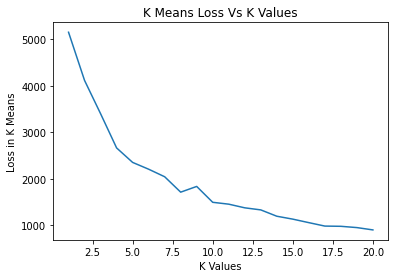

In [ ]:
# Finding the optimal K value via reunning a loop with K Values and Plotting the K Means Loss function and Dindsing the Elbow position of the plot.
k_array = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15, 16, 17, 18, 19, 20])
use_k_means_pp_for_initialize_cluster_means = 1
loss_arr = np.zeros((k_array.shape[0]))
for i in range(k_array.shape[0]):
  (_, _, loss_arr[i], _, _, _ ) = k_means(X, k = k_array[i], use_k_means_pp = use_k_means_pp_for_initialize_cluster_means)
plt.plot(k_array, loss_arr )
plt.xlabel('K Values')
plt.ylabel('Loss in K Means')
plt.title("K Means Loss Vs K Values")
plt.show()

In the above plot the Kink is happening around the k value of 6 in the original K Means algorithm. As we increase the number of clusters it is obvious that loss would continiously be decresing. But from the graph we can see after the K Value of 6 the decrese in loss is relatively small.

##### 1/d) Kernel K Means

###### 1/d) i)   First Approach : Using Landmarks to approximate the data points in RBF kernels (Landmarks based Kernel K Means)

In [ ]:
def rbf_kernel(x,y,gamma=1.0):
  """ Computes the RBF or Gaussian Kernel between two data points """
  return np.exp((-1)*gamma*np.sum((x-y)**2))

def kernel_k_means(X , k = 5, use_k_means_pp = 0, max_iter = 10000,  tolerance = 1e-1000):

  #Landmarks
  new_dim = 3
  landmarks = np.array([[0,0],[-3,5],[3,5]])  # 3 Land marks are chosen to be the centers of two eyes of the smiling face and the center of the whole face
  new_data = np.zeros((X.shape[0], new_dim))  # Transforming the current data values to a 3 dimensional space where each value will represent the RBF distance between each inputs and the 
                                              # 3 chosen Land MArks. After that treat the new transformed data set, which approximates the data sewt features of the infinite dimensional
                                              # Gaussian or RBF Kernel's Hilbert Space, and treat that transformed data to perform the K Means naturally, which result in a K means in the Kernel Space.
  for i in range(X.shape[0]):
    for j in range(new_dim):
      new_data[i,j] = rbf_kernel(X[i,:], landmarks[j])
  (rbf_buckets, rbf_means, _, _, _, indices ) = k_means(X=new_data , k = k, use_k_means_pp = 1, max_iter = max_iter,  tolerance = tolerance)   # Finding the clusters in the approximated data space
  buckets = [[] for _ in range(k)]
  for i in range(k):
    for j in range(len(indices[i])):
      buckets[i].append(X[indices[i][j], :])    # Forming the clsuter in the original feature space via Reverse Mapping of the Clusters in the approximated feature space of RBF Kernel's feature space
  return buckets
 

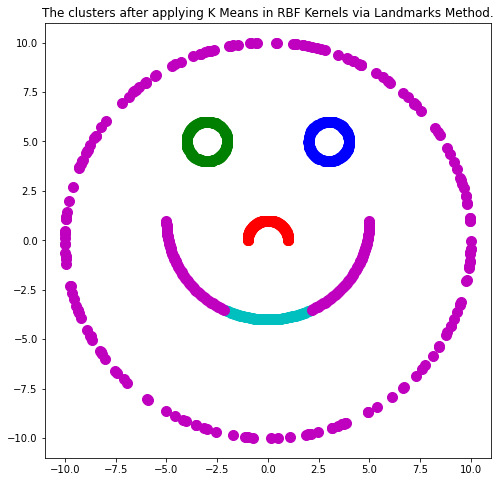

In [ ]:
k=5
buckets = kernel_k_means(X, k = k, use_k_means_pp = 1)
figure = getFigure(8,8)
color = ['r','g','b','c','m','y','k']
for i in range(k):
    each_bucket = np.array(buckets[i])
    plt.scatter(each_bucket[:, 0], each_bucket[:,1],c = color[i%7], s = 100, marker = 'o')
plt.title("The clusters after applying K Means in RBF Kernels via Landmarks Method.")
plt.show()

In [ ]:
import random

###### 1/d) ii) Second Approach : Working with the RBF kernels itself via replacing the inner product

In [ ]:
def getGramMatrix( X, Y, g = 1.0 ):

  # Returning the Kernel Matrix Based on Gaussian RBF Kernels

  return np.exp( - g * (euclidean_distances( X, Y ) **2) )

# Perform the k-means++ initialization in RKHS in dual form
def doKMPPInit( G, k ):
    n = X.shape[0]
    idx = np.zeros( (k,), dtype = int )
    # Find out the squared Hilbertian (essentially Euclidean) norms of the data points in RKHS
    norms = np.diag( G )
    # Calculate pairwise squared Hilbertian distances in RKHS
    D = - 2 * G + norms + norms[:, np.newaxis]
    # Choose a random data point and make it a centroid
    idx[0] = random.randint( 0, n-1 )
    for t in range( 1, k ):
        # For all data points, find the squared Hilbertian distance to the closest centroid
        dist = np.min( D[:, idx[0:t]], axis = 1 )
        # Choose the next centroid to be one that is likely to be far from all currently chosen centroids
        probs = dist/np.sum(dist)
        # Numerical issues in Python may cause ||x-x||_2 to be not exactly zero
        probs[probs < 1e-10] = 0
        idx[t] = np.random.choice( np.arange( n ), p = probs )
    init = np.zeros( (k, n) )
    init[ np.arange(k), idx ] = 1
    # The following normalization is vacuous since
    # every cluster has just one point at the moment
    init / np.sum( init, axis = 1 )[:,np.newaxis]
    return init, idx



# For every point, return which is the closest centroid in terms of Hilbertian distance
def getClosestCentroid( G, alphaVals ):
    k = alphaVals.shape[0]
    n = G.shape[0]
    # Find squared Hilbertian norms of the current centroids
    centroidNorms = np.zeros( (k,) )
    for i in range( k ):
        alphaThisCluster = alphaVals[i,:]
        centroidNorms[i] = alphaThisCluster.dot( G.dot( alphaThisCluster ) )
    # Find the Hilbertian distance of each point from each centroid
    # The first term in the following expression np.diag( G ) is not
    # actually required since it does not affect the argmin at all
    D = np.zeros( (k, n) )
    D = D + np.diag( G ) - 2 * np.matmul( alphaVals, G ) + centroidNorms[:, np.newaxis]
    return np.argmin( D, axis = 0 )

# Update every centroid to the mean of all data points assigned to that cluster
def updateCentroids( G, z, k, prevAlphaVals ):
    alphaVals = np.zeros( (k, G.shape[0]) )
    for i in range( k ):
        if z[z == i].size > 0:
            alphaVals[i, z == i] = 1
            # Normalize the alpha vector
            alphaVals[i,:] = alphaVals[i,:]/np.sum( alphaVals[i,:] )
        # If some cluster is empty, return the old value of its centroid
        else:
            print( "Warning: empty cluster detected" )
            alphaVals[i,:] = prevAlphaVals[i,:]
    if lin.norm( alphaVals - prevAlphaVals, "fro" ) < 1e-15:
        converged = True
        print( "Converged within ", end = '')
    else:
        converged = False
    return (alphaVals, converged)

# Execute the Llyod's algorithm in RKHS
def dokmeans( G, k, init, niter ):
    alphaVals = init
    # Perform alternating minimization for niter steps
    for t in range( niter ):
        z = getClosestCentroid( G, alphaVals )
        alphaVals, conv = updateCentroids( G, z, k, alphaVals )
        if conv:
            print( t, "iterations" )
            return (alphaVals, z)
    return (alphaVals, z)


Converged within 38 iterations


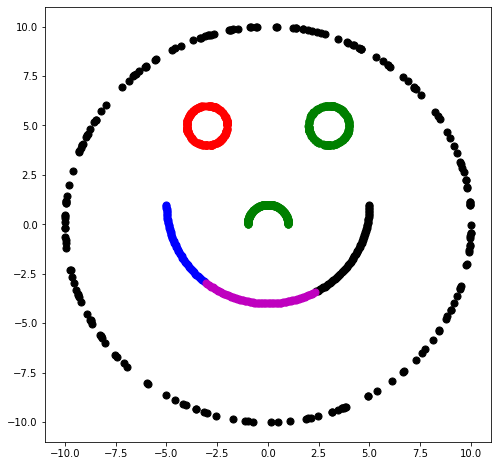

In [ ]:
k = 5

G = getGramMatrix( X, X,  g = 1.0 )

init, idx = doKMPPInit( G, k )
# Cheating a bit to reduce the number of trials required
# to get good initialization :)
# init, idx = doCheatInit( G, k )
(alphaVals, z) = dokmeans( G, k, init, 100 )

fig = getFigure( 8,8 )
plot2D( X[z == 0], fig, size = 50, color = 'r', marker = 'o' )
plot2D( X[z == 1], fig, size = 50, color = 'g', marker = 'o' )
plot2D( X[z == 2], fig, size = 50, color = 'b', marker = 'o' )
plot2D( X[z == 3], fig, size = 50, color = 'k', marker = 'o' )
plot2D( X[z == 4], fig, size = 50, color = 'm', marker = 'o' )


# Highlight the points used to initialize kernel k-means
#pd.plot2D( X[idx,:] , fig, size = 200, color = 'k', marker = 'o', empty = True )

### Q2. Expectation-Maximization

We saw how to use EM to learn parameters for Gaussian mixture models last week. Specifically, for a GMM described by the set of parameters $\{\pi_k, \mu_k, \Sigma_k \}_{k=1}^K$, we saw that the E-step boils down to figuring out the expected assignment of clusters based on a responsibility judgment proportional to $\pi_k~N(\mu_k, \Sigma_k)$, given curent parameter estimates, followed by using GDA MLE updates assuming the current expected assignment in the M-step to update parameter values.

(a) Can you derive the E-step and M-step for an EM algorithm that would work for a Gaussian mixture model wherein the mixture weights $\pi_k$ are known, and the covariances are restricted to be spherical, i.e. $\Sigma_k = \sigma^2_k I$? [20 points]

(b) Implement this algorithm and show that it works on synthetic data with 3 clusters. If you are unable to derive the EM algorithm for part (a), implement the EM algorithm I showed in the class slides for the standard GMM (5 point penalty for taking this option) [15 points]. 

##### 2 / a ) The derivation of the EM steps for the above problem

We know that Expectation Maximization algorithm is a unsupervised algorithm which is generally used various scenarios like finding probabilistic clustering (i.e. finding the probability of a data points belongs to a particular cluster ), estimating various complex probability distribution. The probabilistic clustering or generative clustering is a widely used technique for nomaly detection scenarios in real world. In a real world scenarios, for detecting the anomaly i.e. finding out the probability of a data point belonging to some cliuster or modeling a complex distribution, we are unaware about the which data point belonging to which cluster as well as the shape or parameter of the cluster, but we know the possible number of cluster. So, for such scenarios, where we do not know both the data poinyts belonging to which cluster as well as the cluster shape, Expectation Maximization is used. Thus, we are assuming that our data distribution is modeled by k Gaussians (Gaussioan Mixture model), where the prior probability of eacch gaussian class is fixed or given $\{\pi_{i}\}_{i=1}^k$. \\
We are given that we have n data points X = $\{x_{i}\}_{i=1}^n$, and k cluster Z = $\{z_{i}\}_{i=1}^k$ with the above given prior probability, and each observed data is associuated with each clusters via a soft probability vector  Z = $\{z_{i}\}_{i=1}^n$ and the mean of each of the k cluster is $\{\mu_{i}\}_{i=1}^k$ and the covariance matrix is shericall i.e. $\{\sigma_{i} I_d\}_{i=1}^k$, where $I_d$ denote the identity matrix of d dimension i.e. dimension of the data set. So, the parameters we need to optimize are $\theta = \{ \mu_i, \sigma_i I_d \}_{i=1}^k$. Our latent variables are Z = $\{z_{i}\}_{i=1}^n$ i.e. the cluster names, our observed latent variables are $\{x_{i}\}_{i=1}^n$. And we wish to maximize the likelihood of the observed data points i.e. $P(X | \theta)$.     \\
$$P(X | \theta) = \prod_{i=1}^{n} P(x_i | \theta) = \prod_{i=1}^{n} \sum_{j=1}^{k} P(x_i, z_{ij} | \theta)) =  \prod_{i=1}^{n} \sum_{j=1}^{k} P(x_i | z_{ij} = 1, \theta) * P(z_{ij} = 1 | \theta) = \prod_{i=1}^{n} \sum_{j=1}^{k} P(x_i | z_{ij} = 1, \theta) * \pi_j$$
Here, we have assumed that the data are independently identically distributed. \\ 
Now, taking log in both the side as log is a monotonically increasing function and does not change the maxima or minima poosition.
$$ \ln P(X | \theta) = \ln \prod_{i=1}^{n} \sum_{j=1}^{k} P(x_i | z_{ij} = 1, \theta) * \pi_j $$
$$ = \sum_{i=1}^{n} \ln \sum_{j=1}^{k} P(x_i | z_{ij} = 1, \theta) * \pi_j $$
Thus, from rthe above expression, we can see if we wish to maximize the above equation via Maximum Likelihood Estimation or Newton's Method or Gradient Descent, it would be difficurlt to deakl with the log of sum and omitting the parameters to get the optimum parameter values. Here, Expectqation Maximization comes into the play. \\ 
Via Jensen Inequality for Cobncave functiuon and some proof, we can show that maximizing the abbove log likelihood is similar to maximizing the folowing function 
$$ f(\theta) = \sum_{i=1}^{n} \sum_{j=1}^{k} P(z_{ij} = 1 | x_i, \theta) \ln (P(x_i | z_{ij}, \theta)P(z_{ij}|\theta)) $$
$$ = \sum_{i=1}^{n} \sum_{j=1}^{k} P(z_{ij} = 1 | x_i, \theta) \ln (P(x_i | z_{ij}, \theta) * \pi_j) $$
$$ \sum_{i=1}^{n} \sum_{j=1}^{k} P(z_{ij} = 1 | x_i, \theta) \{ \ln P(x_i | z_{ij}, \theta) + \ln \pi_j \} $$
As we need to maximize $f(\theta)$ w.r.t $\theta$, and $\ln \pi_j$ does not depend on $\theta$, if we remove trhe last term from $f(\theta)$, the optimization problem would not be effected. Hence our new optimization function is a s below 
$$f(\theta) = \sum_{i=1}^{n} \sum_{j=1}^{k} P(z_{ij} = 1 | x_i, \theta)  \ln P(x_i | z_{ij}, \theta) $$
Now we don't now the soft assignments of $z_i$'s. Thus we need to both calculate the soft clustering assignments i.e. the posterior probability of a cluster given the data point, as well as the parameters of the Gaussian Distribution. If the soft probability of each data was available, finding the parameter of rthe gaussian woud quitely be equivalent to the Gaussian Discriminant Analysis ( GDA ). Thus, here we use the EM to solve this problem. \\ 
Expectation Maximization have two steps. The E step, where the expectation of the posterior probability of a cluster assignment being occured given the data point, is maximized, and the M step where the problem becomes equivalent to the Gaussian Discrimibnantr Analysis, i.e. compute the optimum Gaussian Parameters Values given the soft clusterinhg assignewnts.
First we are discussiong the E Step. \\
**E Step :** \\ 

According to Bayes Rule, the posterior probability can be written as follows for individual data set :
$$ P(z_i = j | x_i, \theta) = \frac{P(x_i | z_i = j, \theta)*P(z_i = j)}{\sum_{l=1}^{k} P(x_i | z_i = l, \theta)*P(z_i = l)} , \forall i = \{1,2,..n\}, j = \{1, 2, ....k\}$$

$$or, P(z_{ij} = 1 | x_i, \theta) =  \frac{N(x_i | \mu_j, \sigma_j I_d) * \pi_j}{\sum_{l=1}^{k} N(x_i | \mu_l, \sigma_l I_d) \pi_l}, \forall i = \{1,2,..n\}, j = \{1, 2, ....k\}$$

$$ \therefore \gamma_{ij}  = P(z_{ij} = 1 | x_i, \theta) =  \frac{N(x_i | \mu_j, \sigma_j I_d) * \pi_j}{\sum_{l=1}^{k} N(x_i | \mu_l, \sigma_l I_d) \pi_l}, \forall i = \{1,2,..n\}, j = \{1, 2, ....k\}  $$

Here, $\gamma_{ij}$ denotes the the posterior probability of the latent variables given the data and the parameters of the Gaussian Parameters, i.e. $\gamma_{ij} = P(z_{ij} = 1 | x_i, \theta), \forall i,j$ 

**M Step**

Now as we have the soft clustering probability vector of $\gamma_i = \{\gamma_{i1}, ....\gamma_{ik}\}, \forall i$

$$ \theta_{opt} = arg \;  max _{\theta} \; f(\theta) $$

$$ f(\theta) = \sum_{i=1}^{n} \sum_{j=1}^{k} P(z_{ij} = 1 | x_i, \theta)  \ln P(x_i | z_{ij}, \theta) $$
$$or, f(\theta) = \sum_{i=1}^{n} \sum_{j=1}^{k} \gamma_{ij}  \ln \{ \frac{1}{\sqrt{(2\pi)^d \left | ]\sigma_j^2 I_d\right |}} \; e^{-(x_i - \mu_j)^T) \frac{1}{\sigma_2}I_d(x_i - \mu_j)} \} $$
$$ or, f(\theta) =  \sum_{i=1}^{n} \sum_{j=1}^{k} \gamma_{ij} \{ (-2d)\ln \sigma_j - \frac{1}{\sigma^2}\left \| x_i - \mu_j \right \|_2^2 \} $$
 [ $\because$ f($\theta$) is a function to be optimized based on $\theta$. So, removing the terms which does not depend on $\theta$, would not effect the optimization problem over all.] \\ 
 Now, we need to take the derivative of the above objective function with respect to the mean and the spherical co-variances, and calculate the MLE estimation, which is a quitely Gausssian Discriminant Analysis (GDA) like problem. \\ 
 At first we take the partial derivative of the above with respect to the cluster mean of each cluster and find out an optimum solution for each cluster mean. \\ 

 $$ \frac{\partial }{\partial \mu_j} f(\theta)) = \sum_{i=1}^{n} \gamma_{ij} \{ \frac{2}{\sigma^2} (x_i - \mu_j)\} $$
 Now putting the above partial derivative to zero to calculate the optimum mean value for the j-th cluster 
 $$ \frac{\partial }{\partial \mu_j} f(\theta)) = 0$$
 $$ or, \sum_{i=1}^{n} \gamma_{ij} \{ \frac{2}{\sigma^2} (x_i - \mu_j)\} = 0  $$
 $$ or, \mu_j = \frac{\sum_{i=1}^{n} \gamma_{ij} x_i}{\sum_{i=1}^{n} \gamma_{ij}]} $$
 So,  $\mu_j = \frac{\sum_{i=1}^{n} \gamma_{ij} x_i}{\sum_{i=1}^{n} \gamma_{ij}]}  \; \forall j = \{1, 2, ..k\}$ \\ 
 Now we need to claculate the radius of the spherical clusters in the above same way. Taking the partial derivative of the objective function with respect to each of the radius value of each opfd the spherical cluster, and then equating the first derivative to 0, would give us the optimum value of the objective function, which is derived as a step by step in the following: \\

 $$ \frac{\partial }{\partial \sigma_j} f(\theta) = \frac{\partial }{\partial \sigma_j}[\sum_{i=1}^{n} \sum_{j=1}^{k} \gamma_{ij} \{ (-2d)\ln \sigma_j - \frac{1}{\sigma^2}\left \| x_i - \mu_j \right \|_2^2 \}]
  $$
  $$ or, \frac{\partial }{\partial \sigma_j} f(\theta) = \sum_{i=1}^{n} \gamma_{ij} [ -\frac{2d}{\sigma_j} +  \frac{2 \left \| x_i - \mu_j \right \|_2^2}{\sigma_j^3}] $$
Now below we are setting the derivatives to zero.\\ 
$$ \frac{\partial }{\partial \sigma_j} f(\theta) = 0  $$
$$ or, \sum_{i=1}^{n} \gamma_{ij} [ -\frac{2d}{\sigma_j} +  \frac{2 \left \| x_i - \mu_j \right \|_2^2}{\sigma_j^3}] = 0  $$
$$ or, -\frac{2d}{\sigma_j} \sum_{i=1}^{n} \gamma_{ij} + \frac{2}{\sigma_j^3} \sum_{i=1}^{n} \gamma_{ij} \left \| x_i - \mu_j \right \|_2^2 = 0   $$

$$ or, \sigma_j^2 = \frac{\sum_{i=1}^{n} \gamma_{ij} \left \| x_i - \mu_j \right \|_2^2 }{d\sum_{i=1}^{n} \gamma_{ij}} \; \; \; [\forall j = \{1, 2, ...k\} ] $$

Thus we calculate the diagonals of each of the spherical cluster via the MLE above.

**EM algorithm**

***Step 1*** : Initialize all the parameters of the Gausian Mixture Model. In our case, it would be $\theta = \{ \mu_i, \sigma_i I_d \}_{i=1}^k$.  \\  
***Step 2 or E Step*** : This step often called E Step, where we need to calculate the $\gamma_{ij} \; \forall i, j$ via the equation shown in the E step above. \\
***Step 3 or M Step*** : Calculate the optimum $\theta = \{ \mu_i, \sigma_i I_d \}_{i=1}^k$ values which would optimize the function $f(\theta) =  \sum_{i=1}^{n} \sum_{j=1}^{k} \gamma_{ij} \{ (-2d)\ln \sigma_j - \frac{1}{\sigma^2}\left \| x_i - \mu_j \right \|_2^2 \}$ via MLE, which is shown in the above M Step.  \\ 
***Step 4*** : Repeat the Step 2 i.e. E Step and the Step 3 i.e. M Step until the algorithm converged. The convergence can be tested via multiple ways, like checking the change in the parameter values or change in the objective function, etc. \\ 

Thus, EM is used to do evluate the parameters of Gausian ixture Models (GMM), and the EM steps are shown above to maximize the objective of our given question with the given constraints.




##### 2 / b) Implementation of the above EM algorithm

In [ ]:
from scipy.stats import multivariate_normal                    # multivariate Gaussian distribution
import copy                                                    # Deep Cpopying

E Steps

In [ ]:
def compute_responsibilities(data , means, diag_terms_cov, given_cluster_weights):
    '''E-step: compute responsibilities, given the current parameters'''
    num_data = len(data)
    data_dim = len(data[0])
    num_clusters = len(means)
    resp = np.zeros((num_data, num_clusters))
    
    # Update resp matrix so that resp[i,k] is the responsibility of cluster k for data point i.
    for i in range(num_data):
        for k in range(num_clusters):
            resp[i, k] =    multivariate_normal.pdf(data[i], mean=means[k], cov=diag_terms_cov[k]*np.identity(data_dim)) * given_cluster_weights[k]  
    
    # Add up responsibilities over each data point and normalize
    row_sums = resp.sum(axis=1)[:, np.newaxis]
    resp = resp / row_sums
    
    return resp

M Steps

In [ ]:
def compute_soft_counts(resp):
    # Compute the total responsibility assigned to each cluster, which will be useful when 
    # implementing M-steps below. In the lectures this is called N^{soft}
    counts = np.sum(resp, axis=0)
    return counts

In [ ]:
def compute_means(data, resp, counts):
    num_clusters = len(counts)
    num_data = len(data)
    means = [np.zeros(len(data[0]))] * num_clusters
    
    for k in range(num_clusters):
        # Update means for cluster k using the M-step update rule for the mean variables.
        # This will assign the variable means[k] to be our estimate for \hat{\mu}_k.
        weighted_sum = 0.
        for i in range(num_data):
            weighted_sum += data[i] * resp[i][k]
        means[k] = weighted_sum / counts[k]

    return means

In [ ]:
def compute_covariances(data, resp, counts, means):
    num_clusters = len(counts)
    num_dim = len(data[0])
    num_data = len(data)
    covariances_arr = np.zeros(num_clusters)  # Here, our co-variance matrix is spherical. So, the matrix will be multiplied by the same value 
                                              # across each diagonal element of an Identity matrix. Hence, we are just storing the scaklar values
                                              # for each cluster

    for k in range(num_clusters):
        # Update covariances for cluster k using the M-step update rule for covariance variables.
        weighted_sum = 0        #np.zeros((num_dim, num_dim))
        #print(k)
        #print('A')
        #print(num_clusters)
        for i in range(num_data):
            weighted_sum += resp[i][k] * np.sum(( data[i] - means[k]) ** 2)
        covariances_arr[k] = weighted_sum / (counts[k] * num_dim)

    return covariances_arr

In [ ]:
# The Objective function that is to be maximized for the EM algo to approximately maximize the data likelihood
def objective_fn(data, resp, means, covs, gi):

    num_data = len(data)
    num_dim = len(data[0])
    num_clusters = len(means)

    s = 0
    for i in range(num_data):
      for j in range(num_clusters):
        #print(np.array(means[j]))
        #print(means[j].shape)
        #print(len(means[j]))
        s = s + resp[i,j]*np.log(multivariate_normal.pdf(data[i], mean=np.array(means[j]), cov=covs[j]*np.identity(num_dim)))

    return s

In [ ]:
def log_sum_exp(Z):
    """ Compute log(\sum_i exp(Z_i)) for some array Z."""
    return np.max(Z) + np.log(np.sum(np.exp(Z - np.max(Z))))

def loglikelihood(data,  means, covs, given_cluster_weights):
    """ Compute the loglikelihood of the data for a Gaussian mixture model with the given parameters. """
    num_clusters = len(means)
    num_dim = len(data[0])
    
    ll = 0
    for d in data:
        
        Z = np.zeros(num_clusters)
        for k in range(num_clusters):
            
            # Compute (x-mu)^T * Sigma^{-1} * (x-mu)
            delta = np.array(d) - means[k]
            exponent_term = np.dot(delta.T, np.dot(np.linalg.inv(covs[k]*np.identity(num_dim)), delta))
            
            # Compute loglikelihood contribution for this data point and this cluster
            Z[k] += np.log(given_cluster_weights[k])
            Z[k] -= 1/2. * (num_dim * np.log(2*np.pi) + np.log(np.linalg.det(covs[k]*np.identity(num_dim))) + exponent_term)
            
        # Increment loglikelihood contribution of this data point across all clusters
        ll += log_sum_exp(Z)
        
    return ll

The EM Algorithm

In [ ]:
def EM(data, init_means, init_covariances, given_cluster_weights, maxiter=1000, thresh=1e-10):
    
    # Make copies of initial parameters, which we will update during each iteration
    means = init_means[:]
    covariances = init_covariances[:]
    #weights = init_weights[:]
    
    # Infer dimensions of dataset and the number of clusters
    num_data = len(data)
    num_dim = len(data[0])
    num_clusters = len(means)
    
    # Initialize some useful variables
    resp = np.zeros((num_data, num_clusters))
    ll =  loglikelihood(data,  means, covariances, given_cluster_weights)   #  objective_fn(data, resp, means, covariances)
    ll_trace = [ll]
    
    for it in range(maxiter):
        if it % 5 == 0:
            print("Iteration %s" % it)
        
        # E-step: compute responsibilities
        resp = compute_responsibilities(data,  means, covariances, given_cluster_weights)

        # M-step

        counts = compute_soft_counts(resp)
        
        # Update means for cluster k using the M-step update rule for the mean variables.
        means = compute_means(data, resp, counts)
        
        # Update covariances for cluster k using the M-step update rule for covariance variables.
        covariances = compute_covariances(data, resp, counts, means)
        
        # Compute the objective function at this iteration
        ll_latest = loglikelihood(data,  means, covariances, given_cluster_weights)          #       objective_fn(data, resp, means, covariances)
        ll_trace.append(ll_latest)
        
        # Check for convergence in log-likelihood and store
        if (ll_latest - ll) < thresh and ll_latest > -np.inf:
            break
        ll = ll_latest
    
    if it % 5 != 0:
        print("Iteration %s" % it)
    
    out = { 'means': means, 'covs': covariances, 'objective_fn': ll_trace, 'resp': resp}

    return out

In [ ]:
def generate_MoG_data(num_data, means, covariances, weights):
    """ Creates a list of data points """
    num_clusters = len(means)
    num_dims = len(means[0])
    data = []
    for i in range(num_data):
        #  Use np.random.choice and weights to pick a cluster id greater than or equal to 0 and less than num_clusters.
        k = np.random.choice(len(weights), 1, p=weights)[0]

        # Use np.random.multivariate_normal to create data from this cluster
        x = np.random.multivariate_normal(means[k], covariances[k]*np.identity(num_dims))

        data.append(x)
    return data

In [ ]:
# Model parameters
init_means = [
    [5, 0], # mean of cluster 1
    [1, 1], # mean of cluster 2
    [0, 5]  # mean of cluster 3
]
init_covariances = [0.5, 0.92, 0.5]

init_weights = [1/4., 1/2., 1/4.]  # weights of each cluster

# Generate data
np.random.seed(4)
data = generate_MoG_data(100, init_means, init_covariances, init_weights)

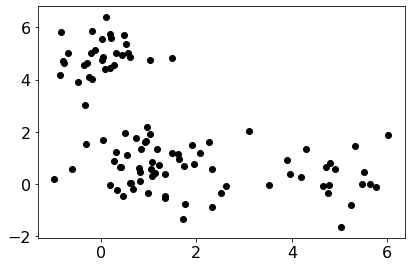

In [ ]:
plt.figure()
d = np.vstack(data)
plt.plot(d[:,0], d[:,1],'ko')
plt.rcParams.update({'font.size':16})
plt.tight_layout()

In [ ]:
#np.random.seed(5)

# Initialization of parameters
chosen = np.random.choice(len(data), 3, replace=False)
initial_means = [data[x] for x in chosen]
initial_covs = [1.0] * 3

# Run EM 
results = EM(data, initial_means, initial_covs, init_weights)

Iteration 0
Iteration 5
Iteration 8


In [ ]:
def bivariate_normal(X, Y, sigmax=1.0, sigmay=1.0,
                 mux=0.0, muy=0.0, sigmaxy=0.0):
    """
    Bivariate Gaussian distribution for equal shape *X*, *Y*.
    See `bivariate normal
    <http://mathworld.wolfram.com/BivariateNormalDistribution.html>`_
    at mathworld.
    """
    Xmu = X-mux
    Ymu = Y-muy

    rho = sigmaxy/(sigmax*sigmay)
    z = Xmu**2/sigmax**2 + Ymu**2/sigmay**2 - 2*rho*Xmu*Ymu/(sigmax*sigmay)
    denom = 2*np.pi*sigmax*sigmay*np.sqrt(1-rho**2)
    return np.exp(-z/(2*(1-rho**2))) / denom

In [ ]:
import matplotlib.mlab as mlab
def plot_contours(data, means, covs, title):
    plt.figure()
    plt.plot([x[0] for x in data], [y[1] for y in data],'ko') # data

    delta = 0.025
    k = len(means)
    #print('K' + str(k))

    x = np.arange(-2.0, 7.0, delta)
    y = np.arange(-2.0, 7.0, delta)
    X, Y = np.meshgrid(x, y)
    col = ['green', 'red', 'indigo']
    for i in range(k):
        mean = means[i]
        cov = covs[i]*np.identity(len(data[0]))
        sigmax = np.sqrt(cov[0][0])
        sigmay = np.sqrt(cov[1][1])
        sigmaxy = cov[0][1]/(sigmax*sigmay)
        Z = bivariate_normal(X, Y, sigmax, sigmay, mean[0], mean[1], sigmaxy)
        plt.contour(X, Y, Z, colors = col[i])
        plt.title(title)
    plt.rcParams.update({'font.size':16})
    plt.tight_layout()

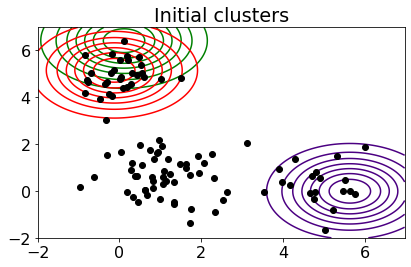

In [ ]:
# Parameters after initialization
plot_contours(data, initial_means, initial_covs, 'Initial clusters')


Iteration 0
Iteration 5
Iteration 8


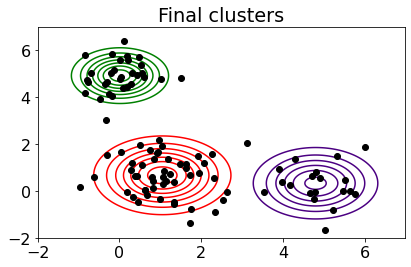

In [ ]:
# Parameters after running EM to convergence
results = EM(data, initial_means, initial_covs, init_weights)
plot_contours(data, results['means'], results['covs'], 'Final clusters')